In [2]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 8.9 MB/s eta 0:00:00


In [3]:
!pip install qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 67.1 MB/s eta 0:00:00


In [4]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

We have to put the same states of alice and bob and eve uses random Basis.
Alice's State:	 [0 0 1 1 1 1 0 1]
Alice's Bases:	 [0 1 0 0 1 1 0 1]
Bob's Bases:	 [0 0 0 0 1 0 0 0]

In [5]:

num_qubits = 8
alice_state = np.array([0, 0, 1, 1, 1, 1, 0, 1])
alice_basis = np.array([0, 1, 0, 0, 1, 1, 0, 1])
bob_basis = np.array([0, 0, 0, 0, 1, 0, 0, 0])
eve_basis = np.random.randint(2, size=num_qubits)

print("Alice's State:", alice_state)
print("Alice's Bases:", alice_basis)
print("Bob's Bases:", bob_basis)
print(f"Eve's Bases:\t {np.array2string(eve_basis)}")

Alice's State: [0 0 1 1 1 1 0 1]
Alice's Bases: [0 1 0 0 1 1 0 1]
Bob's Bases: [0 0 0 0 1 0 0 0]
Eve's Bases:	 [0 1 0 1 1 1 0 0]


###state: array of 0s and 1s denoting the state to be encoded
    basis: array of 0s and 1s denoting the basis to be used for encoding
                #0 -> Computational Basis
                #1 -> Hadamard Basis
    meas_basis: array of 0s and 1s denoting the basis to be used for measurement
                #0 -> Computational Basis
                #1 -> Hadamard Basis

In [6]:
def bb84_circuit(state, alice_basis, bob_basis, eve_basis):

    num_qubits = len(state)

    circuit = QuantumCircuit(num_qubits)

    # Sender (Alice) prepares qubits
    for i in range(len(alice_basis)):
        if state[i] == 1:
            circuit.x(i)
        if alice_basis[i] == 1:
            circuit.h(i)
    circuit.barrier()

    # Eavesdropper (Eve) intercepts qubits
    for i in range(len(eve_basis)):
        if eve_basis[i] == 1:
            circuit.h(i)
    circuit.barrier()
    # Measuring action performed by Bob
    for i in range(len(bob_basis)):
        if bob_basis[i] == 1:
            circuit.h(i)

    circuit.measure_all()

    return circuit

In [7]:
circuit = bb84_circuit(alice_state, alice_basis, bob_basis,eve_basis)
backend=AerSimulator()
job=backend.run(circuit)
result=job.result()
key=result.get_counts().most_frequent()
encryption_key = ''
for i in range(num_qubits):
    if alice_basis[i] == bob_basis[i]:
         encryption_key += str(key[i])
print(f"Key: {encryption_key}")

Key: 01010


In [8]:
print(circuit)

                   ░       ░       ░ ┌─┐                     
   q_0: ───────────░───────░───────░─┤M├─────────────────────
        ┌───┐      ░ ┌───┐ ░       ░ └╥┘┌─┐                  
   q_1: ┤ H ├──────░─┤ H ├─░───────░──╫─┤M├──────────────────
        ├───┤      ░ └───┘ ░       ░  ║ └╥┘┌─┐               
   q_2: ┤ X ├──────░───────░───────░──╫──╫─┤M├───────────────
        ├───┤      ░ ┌───┐ ░       ░  ║  ║ └╥┘┌─┐            
   q_3: ┤ X ├──────░─┤ H ├─░───────░──╫──╫──╫─┤M├────────────
        ├───┤┌───┐ ░ ├───┤ ░ ┌───┐ ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ┤ X ├┤ H ├─░─┤ H ├─░─┤ H ├─░──╫──╫──╫──╫─┤M├─────────
        ├───┤├───┤ ░ ├───┤ ░ └───┘ ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ┤ X ├┤ H ├─░─┤ H ├─░───────░──╫──╫──╫──╫──╫─┤M├──────
        └───┘└───┘ ░ └───┘ ░       ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ───────────░───────░───────░──╫──╫──╫──╫──╫──╫─┤M├───
        ┌───┐┌───┐ ░       ░       ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ┤ X ├┤ H ├─░───────░───────░──╫──╫──╫──╫──╫──╫──╫─┤M├
        



The circuit above is a BB84 quantum key distribution protocol. It is a method for two parties, Alice and Bob, to establish a secret key that can be used to encrypt and decrypt messages.

The circuit works as follows:

1. Alice prepares her qubits in a superposition state.
2. Eve intercepts the qubits and performs a measurement on them.
3. Bob measures the qubits in a basis that is different from Eve's basis.
4. Alice and Bob compare their measurement results. If their results match, they know that Eve did not eavesdrop on the communication.
5. Alice and Bob use the matching measurement results to generate a secret key.

The circuit can be divided into three parts:

* **Alice's part:** The first part of the circuit is where Alice prepares her qubits in a superposition state. This is done by applying the X gate to the qubits that are in the state 1 and the H gate to the qubits that are in the state 0.
* **Eve's part:** The second part of the circuit is where Eve intercepts the qubits and performs a measurement on them. This is done by applying the H gate to the qubits that are in the state 1 and leaving the qubits that are in the state 0 unchanged.
* **Bob's part:** The third part of the circuit is where Bob measures the qubits in a basis that is different from Eve's basis. This is done by applying the H gate to the qubits that are in the state 0 and leaving the qubits that are in the state 1 unchanged.

The circuit above is a simple example of a BB84 protocol. More complex versions of the protocol can be used to improve the security of the key distribution.

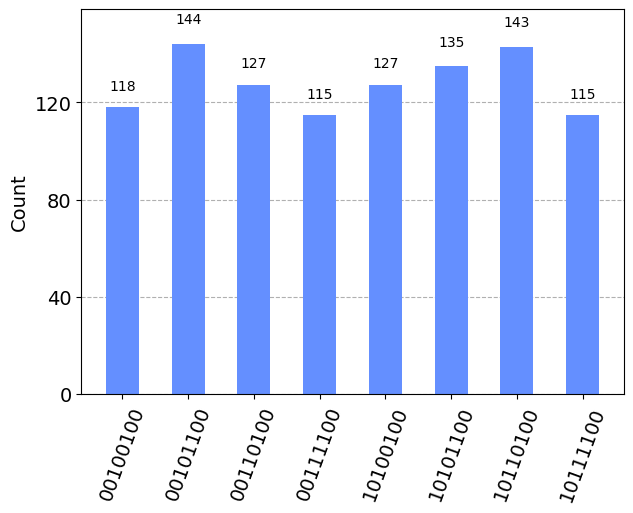

In [9]:
from qiskit.visualization import plot_histogram

plot_histogram(result.get_counts())



The histogram shows the distribution of the measured outcomes. Since Eve is involved, she can gain some information about the key by measuring the qubits in a different basis than Bob. This can be seen in the histogram, as there are more counts for the outcomes that correspond to Eve's basis than for the outcomes that correspond to Bob's basis.

For example, in the given circuit, Eve measures the first qubit in the Hadamard basis and the second qubit in the computational basis. This means that she has a 50% chance of measuring the first qubit correctly and a 100% chance of measuring the second qubit correctly.

Eve's eavesdropping can be detected by Alice and Bob by comparing their key bits. If they find that their keys are different, they know that Eve has been eavesdropping.

**The encryption key for this circuit is 01010**

This one is different from the previous one when even is not involved. So Eve's Presence may be detected.